,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


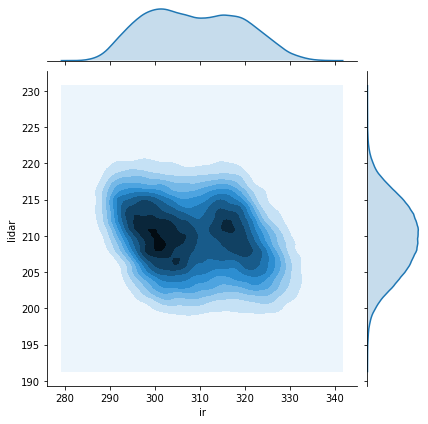

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None, names=("data","time","ir","lidar"))

d = data.loc[:,["ir","lidar"]]

sns.jointplot(d["ir"],d["lidar"],d,kind="kde")
d.cov()

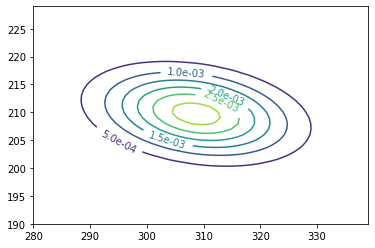

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

x,y = np.mgrid[280:340, 190:230]
pos = np.empty(x.shape +(2,))
pos[:,:,0] = x
pos[:,:,1] = y

irlidar = multivariate_normal(mean=d.mean().values.T,cov=d.cov().values)
cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

plt.show()

Text(0, 0.5, 'y')

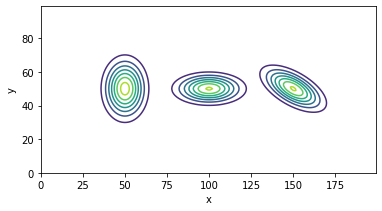

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import math

x,y = np.mgrid[0:200,0:100]
pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y

a = multivariate_normal(mean=[50, 50],cov=[[50,0],[0,100]])
b = multivariate_normal(mean=[100, 50],cov=[[125,0],[0,25]])
c = multivariate_normal(mean=[150, 50],cov=[[100,-25*math.sqrt(3)],[-25*math.sqrt(3),50]])

for e in [a,b,c]:
    plt.contour(x,y,e.pdf(pos))
    
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

In [7]:
eig_vals, eig_vec = np.linalg.eig(c.cov)

print("eig_vals:",eig_vals)
print("eig_vec:", eig_vec)
print("固有ベクトル1:",eig_vec[:,0])
print("固有ベクトル2:",eig_vec[:,1])

eig_vals: [125.  25.]
eig_vec: [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
固有ベクトル1: [ 0.8660254 -0.5      ]
固有ベクトル2: [0.5       0.8660254]


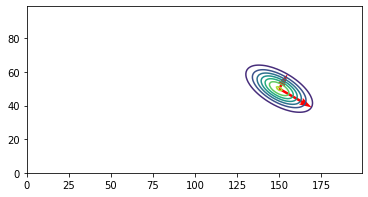

In [8]:
plt.contour(x,y,c.pdf(pos))

v = 2*math.sqrt(eig_vals[0])*eig_vec[:,0]
plt.quiver(c.mean[0],c.mean[1],v[0],v[1],color="red",angles='xy',scale_units='xy',scale=1)

v = 2*math.sqrt(eig_vals[1])*eig_vec[:,1]
plt.quiver(c.mean[0],c.mean[1],v[0],v[1],color="red",angles='xy',scale_units='xy',scale=1)

plt.gca().set_aspect('equal')
plt.show()

In [9]:
V = eig_vec
L = np.diag(eig_vals)

print("分解したものを計算:\n",V.dot(L.dot(np.linalg.inv(V))))
print("元の共分散行列:\n",np.array([[100,-25*math.sqrt(3)],[-25*math.sqrt(3),50]]))

分解したものを計算:
 [[100.         -43.30127019]
 [-43.30127019  50.        ]]
元の共分散行列:
 [[100.         -43.30127019]
 [-43.30127019  50.        ]]
